In [1]:
import os
os.chdir("../../")

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
data_name = 'pbmc_subset'
data_type = "count"

# Freeze Level=0 scores

In [13]:
columns = ['subsample fraction', 'EBM', 'ASW', 'ARI', 'NMI']

In [14]:
freezed0_scnet_count_df = [pd.read_csv(f"./results/subsample/{data_name}/scores_scNet_freeze_level=0_{data_type}_{i}.log", header=None) for i in range(5)]
freezed0_scnet_count_df = pd.concat(freezed0_scnet_count_df)

In [15]:
freezed0_scnet_count_df.columns = columns

In [16]:
freezed0_scnet_scores = freezed0_scnet_count_df.groupby('subsample fraction', as_index=False).mean()

In [17]:
freezed0_scnet_scores

,subsample fraction,EBM,ASW,ARI,NMI
0,0.1,0.548538,0.064171,0.363171,0.511656
1,0.2,0.487953,0.071677,0.340763,0.480603
2,0.4,0.459592,0.073417,0.375496,0.509169
3,0.6,0.436335,0.077914,0.377734,0.516895
4,0.8,0.437899,0.076799,0.403664,0.545156
5,1.0,0.427290,0.076493,0.402728,0.543781


In [20]:
freezed0_scnet_scores['Architecture'] = 'FreezeLevel=0 scNet ' + '(NB)' if data_type == "count" else "(MSE)"

In [21]:
freezed0_scnet_scores

,subsample fraction,EBM,ASW,ARI,NMI,Architecture
0,0.1,0.548538,0.064171,0.363171,0.511656,FreezeLevel=0 scNet (NB)
1,0.2,0.487953,0.071677,0.340763,0.480603,FreezeLevel=0 scNet (NB)
2,0.4,0.459592,0.073417,0.375496,0.509169,FreezeLevel=0 scNet (NB)
3,0.6,0.436335,0.077914,0.377734,0.516895,FreezeLevel=0 scNet (NB)
4,0.8,0.437899,0.076799,0.403664,0.545156,FreezeLevel=0 scNet (NB)
5,1.0,0.427290,0.076493,0.402728,0.543781,FreezeLevel=0 scNet (NB)


# Freeze Level=1 scores

In [22]:
freezed1_scnet_count_df = [pd.read_csv(f"./results/subsample/{data_name}/scores_scNet_freeze_level=1_{data_type}_{i}.log", header=None) for i in range(5)]
freezed1_scnet_count_df = pd.concat(freezed1_scnet_count_df)

In [23]:
freezed1_scnet_count_df.columns = columns

In [24]:
freezed1_scnet_scores = freezed1_scnet_count_df.groupby('subsample fraction', as_index=False).mean()

In [25]:
freezed1_scnet_scores['Architecture'] = 'FreezeLevel=1 scNet ' + '(NB)' if data_type == "count" else "(MSE)"

In [26]:
freezed1_scnet_scores.head()

,subsample fraction,EBM,ASW,ARI,NMI,Architecture
0,0.1,0.569090,0.055841,0.380429,0.532148,FreezeLevel=1 scNet (NB)
1,0.2,0.499752,0.060525,0.354996,0.493783,FreezeLevel=1 scNet (NB)
2,0.4,0.464718,0.059120,0.346483,0.479811,FreezeLevel=1 scNet (NB)
3,0.6,0.426338,0.067880,0.325903,0.473334,FreezeLevel=1 scNet (NB)
4,0.8,0.417429,0.071201,0.308422,0.448718,FreezeLevel=1 scNet (NB)


# Freeze Level=2 scores

In [27]:
freeze2_scnet_count_df = [pd.read_csv(f"./results/subsample/{data_name}/scores_scNet_freeze_level=2_{data_type}_{i}.log", header=None) for i in range(5)]
freeze2_scnet_count_df = pd.concat(freeze2_scnet_count_df)

In [28]:
freeze2_scnet_count_df.columns = columns

In [29]:
freeze2_scnet_scores = freeze2_scnet_count_df.groupby('subsample fraction', as_index=False).mean()

In [30]:
freeze2_scnet_scores['Architecture'] = 'FreezeLevel=2 scNet (NB)'

In [31]:
freeze2_scnet_scores.head()

,subsample fraction,EBM,ASW,ARI,NMI,Architecture
0,0.1,0.574171,0.055928,0.420208,0.569817,FreezeLevel=2 scNet (NB)
1,0.2,0.509689,0.062677,0.408752,0.551890,FreezeLevel=2 scNet (NB)
2,0.4,0.442732,0.074204,0.422181,0.561198,FreezeLevel=2 scNet (NB)
3,0.6,0.397161,0.081927,0.421090,0.555611,FreezeLevel=2 scNet (NB)
4,0.8,0.365400,0.090589,0.416694,0.552746,FreezeLevel=2 scNet (NB)


# scVI scores

In [32]:
scvi_scores = []
for i in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    scvi_scores.append(pd.DataFrame([pd.read_csv(f"./results/subsample/{data_name}/scVI_frac={i}-0.csv").iloc[-1, :] for j in range(5)]).min())
scvi_scores_df = pd.DataFrame(scvi_scores)
scvi_scores_df['subsample fraction'] = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
scvi_scores_df

,Epoch,Elapsed Time,ASW,NMI,ARI,EBM,subsample fraction
0,275.0,5.364427,0.034426,0.449243,0.297359,0.612665,0.1
1,299.0,9.830870,0.021584,0.464138,0.326416,0.617723,0.2
2,185.0,12.942433,0.030816,0.509719,0.376085,0.564497,0.4
3,140.0,14.775402,0.032472,0.474983,0.335443,0.551828,0.6
4,235.0,32.998297,0.015396,0.479070,0.342749,0.590563,0.8
5,250.0,41.593213,0.015277,0.484150,0.356952,0.583345,1.0


In [114]:
# scvi_scores_df = pd.DataFrame([pd.read_csv(f"./results/subsample/{data_name}/scVI_frac={i}-0.csv").iloc[-1, :] for i in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]])
# scvi_scores_df['subsample fraction'] = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

In [33]:
scvi_scores_df['Architecture'] = 'scVI'

In [34]:
scvi_scores_df.drop(['Elapsed Time', 'Epoch'], axis=1, inplace=True)

In [35]:
scvi_scores_df.head()

,ASW,NMI,ARI,EBM,subsample fraction,Architecture
0,0.034426,0.449243,0.297359,0.612665,0.1,scVI
1,0.021584,0.464138,0.326416,0.617723,0.2,scVI
2,0.030816,0.509719,0.376085,0.564497,0.4,scVI
3,0.032472,0.474983,0.335443,0.551828,0.6,scVI
4,0.015396,0.479070,0.342749,0.590563,0.8,scVI


# Integrating results

In [37]:
results_df = pd.concat([freezed0_scnet_scores, freezed1_scnet_scores, freeze2_scnet_scores, scvi_scores_df])
results_df

/home/mohsen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,ARI,ASW,Architecture,EBM,NMI,subsample fraction
0,0.363171,0.064171,FreezeLevel=0 scNet (NB),0.548538,0.511656,0.1
1,0.340763,0.071677,FreezeLevel=0 scNet (NB),0.487953,0.480603,0.2
2,0.375496,0.073417,FreezeLevel=0 scNet (NB),0.459592,0.509169,0.4
3,0.377734,0.077914,FreezeLevel=0 scNet (NB),0.436335,0.516895,0.6
4,0.403664,0.076799,FreezeLevel=0 scNet (NB),0.437899,0.545156,0.8
5,0.402728,0.076493,FreezeLevel=0 scNet (NB),0.427290,0.543781,1.0
0,0.380429,0.055841,FreezeLevel=1 scNet (NB),0.569090,0.532148,0.1
1,0.354996,0.060525,FreezeLevel=1 scNet (NB),0.499752,0.493783,0.2
2,0.346483,0.059120,FreezeLevel=1 scNet (NB),0.464718,0.479811,0.4
3,0.325903,0.067880,FreezeLevel=1 scNet (NB),0.426338,0.473334,0.6


# Subsampling Plot

In [38]:
# results_df['EBM+ARI'] =  results_df['EBM'] + results_df['ARI']
# results_df['EBM+NMI'] =  results_df['EBM'] + results_df['NMI']

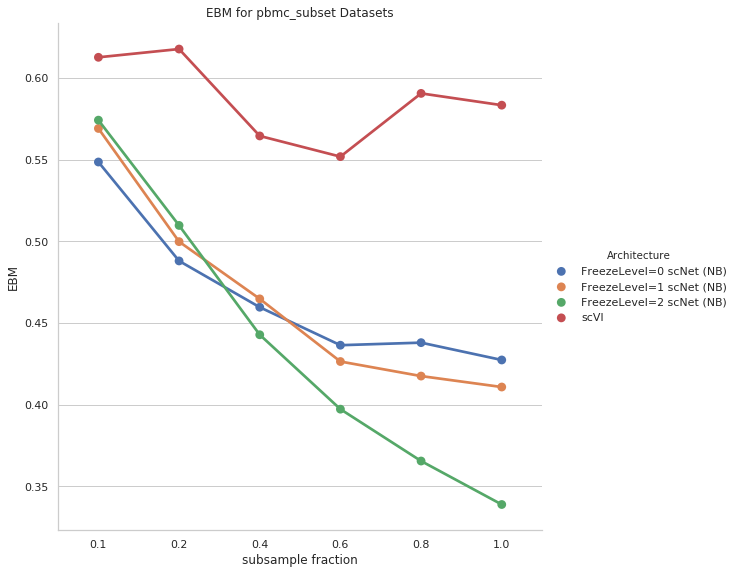

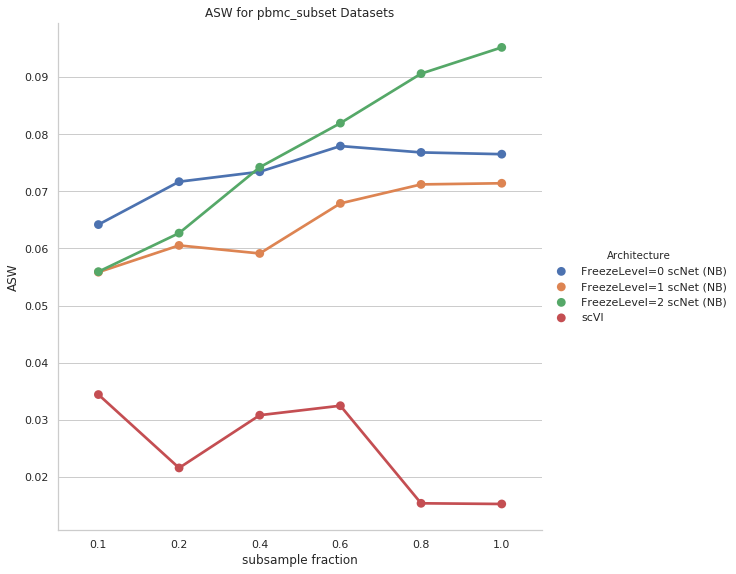

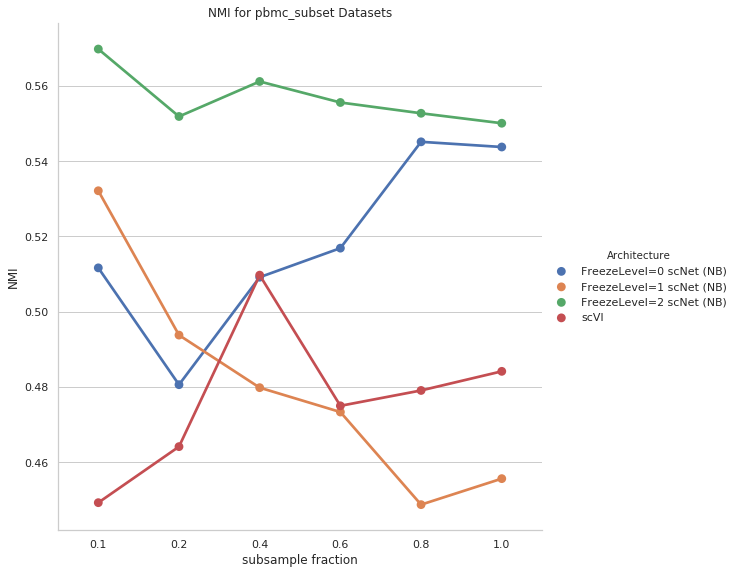

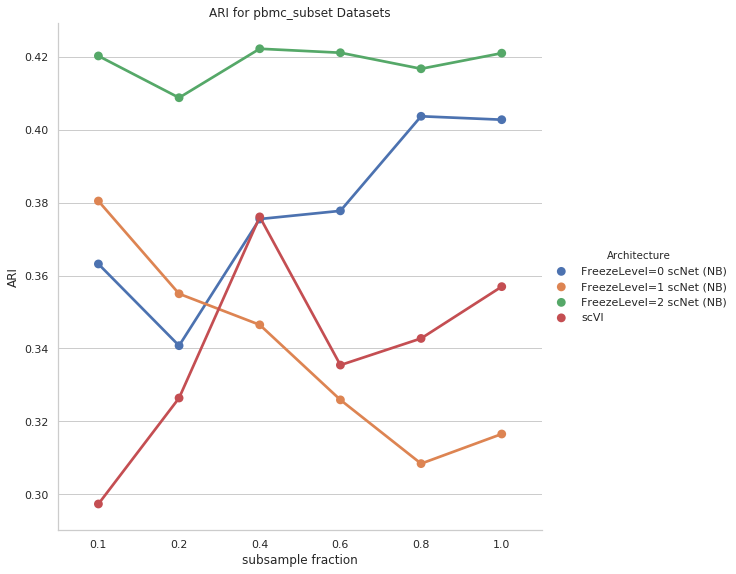

In [40]:
for score in ['EBM', 'ASW', 'NMI', 'ARI']:
    sns.set(style="whitegrid")
    sns.catplot(x="subsample fraction", y=score, hue="Architecture", kind="point", 
                data=results_df, 
                height=8)
    g = plt.title(f"{score} for {data_name} Datasets")
    plt.savefig(f"./results/subsample/{data_name}/{score}.pdf")
# plt.savefig("./results/subsample/toy/scNet.pdf")
# plt.ylim(0.0, 0.5)